- RNN(Recurrent Neural Network, 순환신경망)
    - RNN은 하나의 계층을 의미함(CNN과 유사함)
    - 하나의 계층 안에서 순환하면서 처리가 된다는 의미로 순환신경망이라는 이름을 사용함
    - 순환신경망은 보통 문장 기반의 텍스트 처리, 시간 단위의 시계열 처리에 보통 사용되고 있음

- RNN의 종류
    - SimpleRNN(심플순환신경망)
    - LSTM(Long Shot-Term Memory, 장기기억 순환신경망)
    - GRU(Gated Recurrent Unit, 게이트웨이 반복 단위 순환신경망)
    - RNN 신경망의 발전 과정 : SimpleRNN -> LSTM -> GRU

- RNN의 특징
    - 기억이라는 개념이 적용된 신경망임
    - 기존기억 - 현재값 - 다음값 예측 - 오래된 기억 소멸

#### 사용할 라이브러리

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
tf.keras.utils.set_random_seed(42)

### 사용할 데이터셋
# - 영화 리뷰 감상평 데이터(긍정/부정)
from tensorflow.keras.datasets import imdb

### 텍스트 길이 정규화 라이브러리
# - 텍스트의 길이가 긴 경우 자르고 길이가 짧은 경우에는 채움
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 데이터 읽어들이기

- IMDB : 영화 리뷰 감상평 데이터셋
    - 실제 리뷰에 대한 텍스트를 숫자(사전 내에 인덱스)화하여 제공하는 데이터임
    - 순환신경망에서 대표적으로 사용되는 샘플 데이터셋으로 미국 데이터임
    - 케라스에서 영어로된 문장을 정수(사전의 인덱스 번호)로 변환하여 제공함
        - 데이터 사전을 말뭉치 사전이라고 표현
    - 문장의 각 단어들이 숫자로만 되어 있기 때문에, 영문에 대한 원본 텍스트는 알지 못함
    - 각 문장들의 감상평은 "긍정(1)"과 "부정(0)"으로 라벨링(종속변수의 범주) 되어 있음
    - 총 50,000개의 샘플 데이터로 되어 있으며, 훈련 및 테스트 데이터로 25,000개씩 분리하여 제공해줌
    - 데이터를 읽어들일 때 사용할 말뭉치 갯수, 즉 num_words를 500으로 지정
    - 50,000건의 리뷰 문장에 포함된 모든 단어들은 말뭉치 사전 500개 내에 포함되어 있음

In [2]:
### 데이터 수집
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(25000,) (25000,)
(25000,) (25000,)


In [3]:
### 훈련 0번째 데이터 확인해보기
print(train_input[0])

### 훈련 0번째 데이터의 단어 갯수 확인하기
print(len(train_input[0]))

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
218


In [4]:
### 훈련 0번째 데이터 확인해보기
print(train_input[1])

### 훈련 0번째 데이터의 단어 갯수 확인하기
print(len(train_input[1]))

[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2, 2, 5, 2, 4, 116, 9, 35, 2, 4, 229, 9, 340, 2, 4, 118, 9, 4, 130, 2, 19, 4, 2, 5, 89, 29, 2, 46, 37, 4, 455, 9, 45, 43, 38, 2, 2, 398, 4, 2, 26, 2, 5, 163, 11, 2, 2, 4, 2, 9, 194, 2, 7, 2, 2, 349, 2, 148, 2, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 2, 98, 5, 4, 228, 9, 43, 2, 2, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 2, 228, 2, 5, 2, 2, 245, 2, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 2, 14, 9, 6, 371, 78, 22, 2, 64, 2, 9, 8, 168, 145, 23, 4, 2, 15, 16, 4, 2, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
189


- 각 문장 단어의 갯수가 모두 다름
    - 훈련을 위해서는 입력계층에 사용할 input_shape를 지정해야 함
        - 이때 통일된 값을 알고 있어야 지정이 가능함
    - 전체 문장에 대한 단어의 갯수를 통일하기 위한 전처리가 필요함

#### 훈련 : 검증 = 8 : 2 분리

In [5]:
### 변수명 : train_input, train_target, val_input, val_target
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [6]:
print(train_input.shape, train_target.shape)
print(val_input.shape, val_target.shape)
print(test_input.shape, test_target.shape)

(20000,) (20000,)
(5000,) (5000,)
(25000,) (25000,)


#### 데이터 스케일링(텍스트의 단어 갯수 통일시키기)

In [7]:
### 모든 데이터의 문장 길이를 확인하여 가장 많이 분포하는 위치를 기준
# - 통일시키는 처리 진행

### 훈련 독립변수의 각 문장 데이터들의 문장길이(단어의 갯수)를 확인함
# - 하나의 배열에 저장하기
# 변수명 : lengths
len(train_input), len(train_input[0])
lengths = []
for idx in range(len(train_input)) :
    lengths.append(len(train_input[idx]))
    
print(len(lengths))
    

20000


In [8]:
### 다른방법 한줄코딩
lengths = np.array([ len(x) for x in train_input ])
print(len(lengths))

20000


In [9]:
### 최대값, 최소값, 평균값, 중앙값 확인

max(lengths), min(lengths), np.mean(lengths), np.median(lengths)

(1854, 11, 239.00925, 178.0)

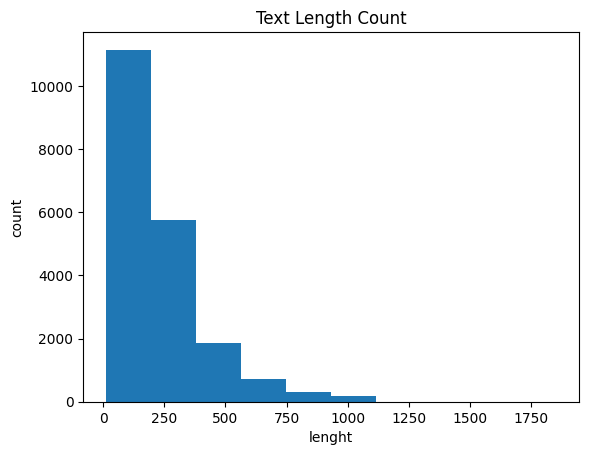

In [10]:
### 히스토그램으로 시각화
# - 히스토그램 : 각 데이터의 빈도값(밀집도)으로 표현되는 시각화(막대그래프 모양)
# - hist() 함수 사용

# - x축은 각 문장별 단어의 길이(사이즈)값
# - y축은 각 문장별 단어의 길이(사이즈)의 빈도값

plt.title("Text Length Count")
plt.hist(lengths)
plt.xlabel("lenght")
plt.ylabel("count")
plt.show()

In [11]:
### 해석
# - 단어 갯수의 전반적인 분포는 왼쪽에 편중되어 있음
# - 중앙값 178을 기준으로 분포 되어 있는 것을 확인

# - 훈련을 위해 사용할 표준 길이를 정하기 위한 방법
#   (특정한 벙법은 없음, 데이터 형태를 기준으로 판단)
#       -> 단어 갯수의 최대값(max)을 기준으로 정하는 방법
#       -> 단어 갯수의 중앙값을 기준으로 정하는 방법
#       -> 시각화를 기준으로 분석가의 판단에 의해 정하는 방법

#### 각 문장의 단어 길이(사이즈)를 기준으로 잡은 100개로 통일(스케일링)하기

- pad_sequences() : 텍스트의 길이를 기준 값으로 통일시키는 함수
    - 사용되는 속성 : 원본데이터, maxlen
    - 원본데이터 -> 훈련 또는 검증 또는 테스트 데이터
    - maxlen -> 기준값(100)

    - maxlen보다 작으면 : 0으로 값을 채우기
    - maxlen보다 크면   : 100을 초과하는 값들은 제거

    - 결과값의 차원은 2차원

In [12]:
### 훈련 데이터 스케일링
train_seq = pad_sequences(train_input, maxlen=100, truncating="post", padding="post")
print(train_seq.shape)

### 검증 데이터 스케일링
val_seq = pad_sequences(val_input, maxlen=100, truncating="post", padding="post")
print(val_seq.shape)

(20000, 100)
(5000, 100)


In [13]:
### 훈련데이터 확인
print(train_input[19999])
print(train_seq[19999])

[1, 480, 20, 13, 219, 14, 20, 18, 4, 86, 58, 23, 6, 2, 5, 100, 24, 264, 15, 13, 69, 24, 60, 2, 7, 12, 159, 397, 23, 15, 2, 137, 12, 203, 306, 33, 86, 8, 30, 6, 2, 2, 12, 9, 6, 22, 15, 316, 144, 67, 5, 80, 358, 349, 106, 14, 20, 19, 294, 25, 119, 25, 80, 358, 12, 17, 76, 17, 59, 127, 5, 12, 80, 2, 25, 194, 2]
[  1 480  20  13 219  14  20  18   4  86  58  23   6   2   5 100  24 264
  15  13  69  24  60   2   7  12 159 397  23  15   2 137  12 203 306  33
  86   8  30   6   2   2  12   9   6  22  15 316 144  67   5  80 358 349
 106  14  20  19 294  25 119  25  80 358  12  17  76  17  59 127   5  12
  80   2  25 194   2   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


- 제거 및 채우기 속성
- truncating : maxlen보다 클 때 자르기 속성
    - truncating="pre" : 앞쪽 제거(기본값으로 사용됨, 생략가능)
    - truncating="post" : 뒤쪽 제거
* padding : maxlen보다 작을 때 채우기 속성
    - padding="pre" : 앞쪽을 0으로 채우기 (기본값으로 사용됨, 생략가능)
    - padding="post": 뒤쪽을 0으로 채우기

In [14]:
### 훈련 데이터 스케일링
train_seq = pad_sequences(train_input, maxlen=100, truncating="post", padding="post")
print(train_seq.shape)

### 검증 데이터 스케일링
val_seq = pad_sequences(val_input, maxlen=100, truncating="post", padding="post")
print(val_seq.shape)

(20000, 100)
(5000, 100)


In [15]:
### 훈련데이터 확인
print(train_input[0])
print(train_seq[0])

print(train_input[19999])
print(train_seq[19999])

[1, 73, 89, 81, 25, 60, 2, 6, 20, 141, 17, 14, 31, 127, 12, 60, 28, 2, 2, 66, 45, 6, 20, 15, 497, 8, 79, 17, 491, 8, 112, 6, 2, 20, 17, 2, 2, 4, 436, 20, 9, 2, 6, 2, 7, 493, 2, 6, 185, 250, 24, 55, 2, 5, 23, 350, 7, 15, 82, 24, 15, 2, 66, 10, 10, 45, 2, 15, 4, 20, 2, 8, 30, 17, 2, 5, 2, 17, 2, 190, 4, 20, 9, 43, 32, 99, 2, 18, 15, 8, 157, 46, 17, 2, 4, 2, 5, 2, 9, 32, 2, 5, 2, 267, 17, 73, 17, 2, 36, 26, 400, 43, 2, 83, 4, 2, 247, 74, 83, 4, 250, 2, 82, 4, 96, 4, 250, 2, 8, 32, 4, 2, 9, 184, 2, 13, 384, 48, 14, 16, 147, 2, 59, 62, 69, 2, 12, 46, 50, 9, 53, 2, 74, 2, 11, 14, 31, 151, 10, 10, 4, 20, 9, 2, 364, 352, 5, 45, 6, 2, 2, 33, 269, 8, 2, 142, 2, 5, 2, 17, 73, 17, 204, 5, 2, 19, 55, 2, 2, 92, 66, 104, 14, 20, 93, 76, 2, 151, 33, 4, 58, 12, 188, 2, 151, 12, 215, 69, 224, 142, 73, 237, 6, 2, 7, 2, 2, 188, 2, 103, 14, 31, 10, 10, 451, 7, 2, 5, 2, 80, 91, 2, 30, 2, 34, 14, 20, 151, 50, 26, 131, 49, 2, 84, 46, 50, 37, 80, 79, 6, 2, 46, 7, 14, 20, 10, 10, 470, 158]
[  1  73  89  81  25 

#### SimpleRNN(심플순환신경망)으로 훈련
- SimpleRNN 계층 설정 방법
    - 입력 또는 은닉계층으로 사용가능
    - 입력 데이터의 차원(input_shape) = 특성갯수(문자길이), 말뭉치 사전갯수로 정의 = (100, 500)

In [16]:
### 훈련모델 생성하기
model = keras.Sequential()
model

In [17]:
### 입력 계층 생성 및 모델에 추가하기(SimpleRNN 계층 사용)
model.add(
    keras.layers.SimpleRNN(units=8, input_shape=(100, 500))
)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
Total params: 4,072
Trainable params: 4,072
Non-trainable params: 0
_________________________________________________________________


In [19]:
### 출력계층 생성 및 모델에 추가하기
# - 최종 결과는 긍정(1) 또는 부정(0)을 분류한 값이 출력하게 함
# - 이진분류 : 활설화함수는 sigmoid 사용
model.add(
    keras.layers.Dense(units=1, activation="sigmoid")
)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [21]:
### 모델 설정하기(compile)
# - 옵티마이저 : RMSprop 사용
# - 학습율(learning_rate) : 0.01 사용
# - 훈련시 정확도 출력(metrics)
# - loss 손실함수 : 이진분류

rmsprop = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(
    optimizer=rmsprop,
    loss="binary_crossentropy",
    metrics="accuracy"
)

#### 콜백함수 정의하기

In [22]:
### 최적의 시점 모델 저장 콜백함수 정의
# - 저장위치 : model 폴더
# - 저장 파일명 : best_simpleRNN_model.h5
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "./model/best_simpleRNN_model.h5",
    save_best_only=True
)

### 자동종료 콜백함수 정의
# - 자동 종료 시점 확인을 위한 추가 epoch : 3
earlystopping_cb = keras.callbacks.EarlyStopping(
    patience=3, restore_best_weights=True
)

checkpoint_cb, earlystopping_cb

(<keras.callbacks.ModelCheckpoint at 0x1e912e7e760>,
 <keras.callbacks.EarlyStopping at 0x1e912e7ec10>)

In [ ]:
### 훈련데이터의 차원 확인
train_seq.shape

### 모델 입력계층의 input_shape에는 문자의 갯수, 말뭉치 갯수가 포함된 2차원 데이를 사용하고 있음
# - 훈련데이터에는 문자의 갯수만 있음 -> 따라서 말뭉치 500개에 대응하는 차원을 추가해 주어야 함
# - 100개의 문자에 대한 500개 말뭉치와 매핑 작업에 대한 전처리 진행 필요

(20000, 100)

* RNN에서 사용하는 독립변수 데이터 처리
    - RNN 모델에서는 독립변수 데이터를 500개의 말뭉치로 매핑해서 훈련을 시켜야 함
    - 매핑 방법 : 원-핫 인코딩, 임베딩 방식 중에 한가지를 사용해서 매핑 형태로 만들어야 함
             
* 원-핫 인코딩(One-Hot Encodigng) 방식
    - 각 데이터 중에 1개 단어당 말뭉치 사전의 500개와 매핑
    - 각 데이터의 단어들이 말뭉치의 몇번째에 위치하는 지를 원-핫인코딩 형태 구조로 변경
    - 사용라이브러리 : keras.util.to_catetorical() 함수 사용
    - 별도로 변환하는 계층은 존재하지 않으며, 프로그램으로 변환해야 함
    - 원-핫 인코딩을 수행하면 특성이 매우 많아지기에, 훈련 처리 속도가 매우 느려지는 단점이 있으며, 메모리 공간을 많이 차지함
 
* 단어 임베딩(Embedding) 방식
    - 원-핫 인코딩 방식의 단점을 보완하기 위해 개선된 방식임
    - 데이터의 주요 특성들로 모으는 작업을 수행 -> 머신러닝의 주성분분석(PCA), CNN의 풀링계층(Pooling Layer)과 유사한 개념임
    - 주요 특성 : 단어간의 유사도가 가까운 값들을 의미함(유사도가 먼 값들은 제외)
    -  (예시: 강아지와 고양이, 행복과 좋음 등은 유사한 성격임, 강아지와 행복은 유사한 성격이 아님)
    - Embedding 계층을 사용 : 유사도가 가까운 단어들을 모으는 계층
   
    - 많은 공간을 사용하지 않고 사용함
    - 임베딩 계층을 통해 사용됨 : layer 계층을 추가하여 사용(프로그램 방식 아님)
    - 계층명 : keras.layers.Embedding()

In [24]:
train_seq[0]

array([  1,  73,  89,  81,  25,  60,   2,   6,  20, 141,  17,  14,  31,
       127,  12,  60,  28,   2,   2,  66,  45,   6,  20,  15, 497,   8,
        79,  17, 491,   8, 112,   6,   2,  20,  17,   2,   2,   4, 436,
        20,   9,   2,   6,   2,   7, 493,   2,   6, 185, 250,  24,  55,
         2,   5,  23, 350,   7,  15,  82,  24,  15,   2,  66,  10,  10,
        45,   2,  15,   4,  20,   2,   8,  30,  17,   2,   5,   2,  17,
         2, 190,   4,  20,   9,  43,  32,  99,   2,  18,  15,   8, 157,
        46,  17,   2,   4,   2,   5,   2,   9,  32])

### 원-핫 인코딩 방식 사용하기

In [25]:
### 훈련데이터를 원핫인코딩으로 변환
train_oh = keras.utils.to_categorical(train_seq)

### 검증데이터를 원핫인코딩으로 변환
val_oh = keras.utils.to_categorical(val_seq)

train_oh.shape, val_oh.shape

((20000, 100, 500), (5000, 100, 500))

In [26]:
### 데이터 확인
# - 0번째 문장에 들어있는 값(말뭉치사전의 인덱스 값)
print(train_seq[0])

# - 0번째 문장 중에 0번째 값(말뭉치사전의 인덱스 위치는 1로 나머지는 0으로)
# print(train_oh[0][0])
print(train_oh[0][1])

[  1  73  89  81  25  60   2   6  20 141  17  14  31 127  12  60  28   2
   2  66  45   6  20  15 497   8  79  17 491   8 112   6   2  20  17   2
   2   4 436  20   9   2   6   2   7 493   2   6 185 250  24  55   2   5
  23 350   7  15  82  24  15   2  66  10  10  45   2  15   4  20   2   8
  30  17   2   5   2  17   2 190   4  20   9  43  32  99   2  18  15   8
 157  46  17   2   4   2   5   2   9  32]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.

#### 모델 훈련시키기

In [27]:
### 훈련횟수 : 100회, 배치사이즈 64, 검증데이터 사용, 콜백함수 사용
# - 훈련결과는 history 변수에 담기

history = model.fit(
    train_oh, train_target, epochs=100, batch_size=64,
    validation_data=(val_oh, val_target),
    callbacks=[checkpoint_cb, earlystopping_cb]
)

Epoch 1/100
313/313 [==============================] - 23s 62ms/step - loss: 0.6955 - accuracy: 0.5095 - val_loss: 0.6954 - val_accuracy: 0.5136
Epoch 2/100
313/313 [==============================] - 16s 52ms/step - loss: 0.6852 - accuracy: 0.5511 - val_loss: 0.6832 - val_accuracy: 0.5718
Epoch 3/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6470 - accuracy: 0.6296 - val_loss: 0.6778 - val_accuracy: 0.5958
Epoch 4/100
313/313 [==============================] - 17s 53ms/step - loss: 0.6324 - accuracy: 0.6464 - val_loss: 0.6400 - val_accuracy: 0.6590
Epoch 5/100
313/313 [==============================] - 16s 52ms/step - loss: 0.6047 - accuracy: 0.6841 - val_loss: 0.6234 - val_accuracy: 0.6826
Epoch 6/100
313/313 [==============================] - 16s 52ms/step - loss: 0.5972 - accuracy: 0.6920 - val_loss: 0.6489 - val_accuracy: 0.6472
Epoch 7/100
313/313 [==============================] - 16s 50ms/step - loss: 0.5959 - accuracy: 0.6899 - val_loss: 0.6673 - val_ac

### 훈련 vs 검증 손실 곡선

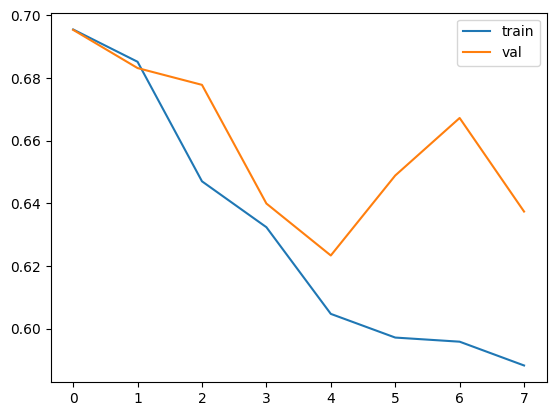

In [28]:
plt.plot(history.epoch, history.history["loss"])
plt.plot(history.epoch, history.history["val_loss"])
plt.legend(["train", "val"])
plt.show()

### 훈련 vs 검증 정확도 곡선

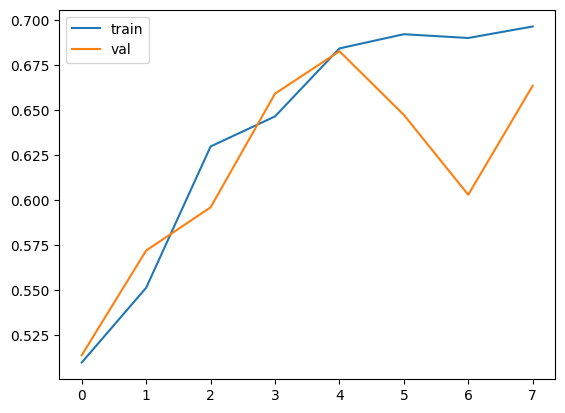

In [29]:
plt.plot(history.epoch, history.history["accuracy"])
plt.plot(history.epoch, history.history["val_accuracy"])
plt.legend(["train", "val"])
plt.show()

### 단어 임베딩 방식으로 훈련데이터 전처리

- 단어 임베딩 방식
    - 모델 내에 계층으로 사용되는 계층(훈련에 영향을 미치는 계층)
    - RNN 계층 전에 위치함
    - 임베딩 계층 속성들
        - input_dim : 말뭉치 갯수
        - output_dim : 임베딩 크기(주요 특징을 가지는 특성 출력 갯수)
        - input_length : 사용할 특성의 갯수(각 문장 단어의 갯수=100)
    - RNN 계층 전에 입력계층으로 사용됨

In [30]:
### 모델 생성
model = keras.Sequential()
model

### 입력계층(임베딩계층) 생성 및 모델에 추가
model.add(
    keras.layers.Embedding(
        input_dim = 500, output_dim = 16, input_length = 100
    )
)

### SimpleRNN 계층 추가
model.add(
    keras.layers.SimpleRNN(units=8)
)

### 출력계층 추가
model.add(
    keras.layers.Dense(
        units = 1,
        activation = "sigmoid"
    )
)

model.summary()


# 임베딩 Param = 말뭉치갯수 * 출력갯수 = 500 * 16 = 8,000
# SimpleRNN Param = 출력갯수 * (입력갯수 + 출력갯수 + 1)
#                 = 8 * (16 + 8 + 1) = 200

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [31]:
### 모델 설정하기(compile)
rmsprop = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(
    optimizer=rmsprop,
    loss = "binary_crossentropy",
    metrics="accuracy"
)

### 콜백함수 정의
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "./model/best_simpleRNN_embedding_model.h5",
    save_best_only=True
)
earlystopping_cb = keras.callbacks.EarlyStopping(
    patience = 3,
    restore_best_weights=True
)

In [32]:
### 모델 훈련
model.fit(
    train_seq, train_target, epochs=100, batch_size=64,
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, earlystopping_cb]
)

Epoch 1/100
313/313 [==============================] - 20s 62ms/step - loss: 0.6935 - accuracy: 0.5122 - val_loss: 0.6925 - val_accuracy: 0.5154
Epoch 2/100
313/313 [==============================] - 19s 61ms/step - loss: 0.6702 - accuracy: 0.5893 - val_loss: 0.6751 - val_accuracy: 0.5812
Epoch 3/100
313/313 [==============================] - 20s 63ms/step - loss: 0.6442 - accuracy: 0.6371 - val_loss: 0.6847 - val_accuracy: 0.5810
Epoch 4/100
313/313 [==============================] - 19s 61ms/step - loss: 0.6363 - accuracy: 0.6459 - val_loss: 0.6348 - val_accuracy: 0.6664
Epoch 5/100
313/313 [==============================] - 19s 60ms/step - loss: 0.6258 - accuracy: 0.6565 - val_loss: 0.6572 - val_accuracy: 0.6048
Epoch 6/100
313/313 [==============================] - 19s 62ms/step - loss: 0.6325 - accuracy: 0.6474 - val_loss: 0.6594 - val_accuracy: 0.6270
Epoch 7/100
313/313 [==============================] - 20s 64ms/step - loss: 0.6280 - accuracy: 0.6488 - val_loss: 0.6697 - val_ac

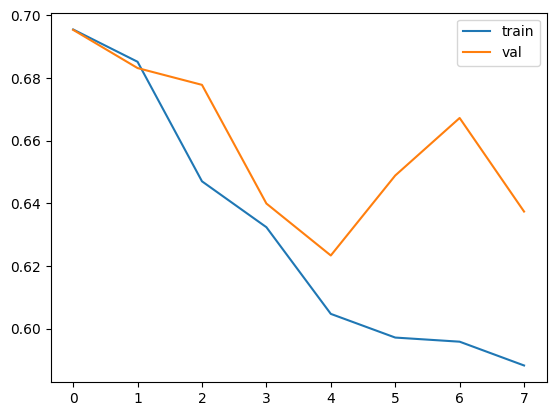

In [33]:
### 훈련 vs 검증 손실곡선
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "val"])
plt.show()

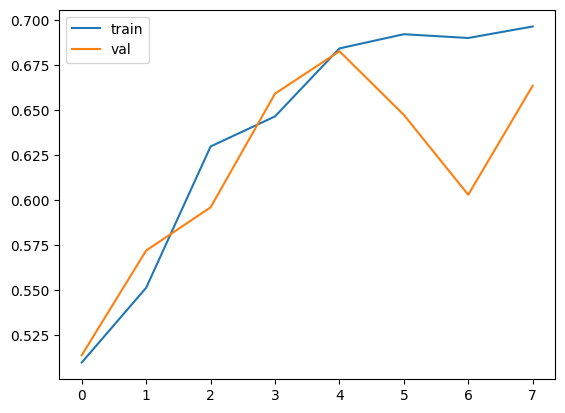

In [34]:
### 훈련 vs 검증 정확도곡선
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train", "val"])
plt.show()